# Project 1: Introduction to Airfoils and XFOIL

#### Author: Jack Comey

##### Student ID: 915323775
##### Due Date: 2:00 PM Monday 26 OCT 2020

###### Code Imports and Basic Function Definition:

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 23 14:38:28 2020

@author: jack
"""

# Imports 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from math import *
plt.style.use("seaborn-bright")
%matplotlib inline

params={#FONT SIZES
    'axes.labelsize':30,#Axis Labels
    'axes.titlesize':30,#Title
    'font.size':28,#Textbox
    'xtick.labelsize':22,#Axis tick labels
    'ytick.labelsize':22,#Axis tick labels
    'legend.fontsize':24,#Legend font size
    'font.family':'serif',
    'font.fantasy':'xkcd',
    'font.sans-serif':'Helvetica',
    'font.monospace':'Courier',
    #AXIS PROPERTIES
    'axes.titlepad':2*6.0,#title spacing from axis
    'axes.grid':False,#grid on plot
    'figure.figsize':(12,12),#square plots
    'savefig.bbox':'tight',#reduce whitespace in saved figures#LEGEND PROPERTIES
    'legend.framealpha':0.5,
    'legend.fancybox':True,
    'legend.frameon':True,
    'legend.numpoints':1,
    'legend.scatterpoints':1,
    'legend.borderpad':0.1,
    'legend.borderaxespad':0.1,
    'legend.handletextpad':0.2,
    'legend.handlelength':1.0,
    'legend.labelspacing':0,}
mpl.rcParams.update(params)

#%%###########################

# Custom Functions

def plothusly(ax, x, y, *, xtitle='', ytitle='',
              datalabel='', title='', linestyle='-',
              marker=''):
    """
    A little function to make graphing less of a pain.
    Creates a plot with titles and axis labels.
    Adds a new line to a blank figure and labels it.

    Parameters
    ----------
    ax : The graph object
    x : X axis data
    y : Y axis data
    xtitle : Optional x axis data title. The default is ''.
    ytitle : Optional y axis data title. The default is ''.
    datalabel : Optional label for data. The default is ''.
    title : Graph Title. The default is ''.

    Returns
    -------
    out : Resultant graph.

    """

    ax.set_xlabel(xtitle)
    ax.set_ylabel(ytitle)
    ax.set_title(title)
    out = ax.plot(x, y, zorder=1, label=datalabel, linestyle = linestyle,
                  marker = marker)
    plt.grid()
    plt.legend(loc='best')
    return out


def plothus(ax, x, y, *, datalabel='', linestyle = '-',
            marker = ''):
    """
    A little function to make graphing less of a pain

    Adds a new line to a blank figure and labels it
    """
    out = ax.plot(x, y, zorder=1, label=datalabel, linestyle = linestyle,
                  marker = marker)
    plt.legend(loc='best')

    return out



## 1 | Airfoil Geometry Characteristics

This problem is primarily a plotting excersize, and consists of plotting two NACA airfoils, the NACA0018 and NACA2418, given in the problem statement.

### 1.1 | Symmetric Airfoils

The goal of Problem 1.1 is to generate geometry data for a NACA 0018 airfoil, given the NACA number and the NACA thickess distribution equation. 

#### 1.1.1 | Approach

While this problem, and the subsequent cambered airfoil problem that follows, could be solved individually, it is better to create a generalized NACA airfoil geometry function, and use that to solve both. To achieve this, a function was created, which accepted the airfoil NACA number as broken into its' component parts (that is, ratio of max camber to chord length, location of max camber, and airfoil thickness ratio). The function begins by taking each NACA number and adjusting it to the appropriate magnitude (e.g. 18 to 0.18, in this case).

It then creates an equally spaced series of points using numpy's linspace() function to serve as the non-dimensionalized x-coordiantes. The option to use an alternative set of x-coordinates was created to fit Problem 3.3, and is not relevant in this case.

Airfoil thickness relative to the camber line is then calculated. Starting with an array of zeros of equal length to the non-dimensionalized x-coordinates, each term in the NACA thickness distribution equation is individually added or subtracted as necessary. This has several advantages, the first of which is that the code is more human readable. It's also easier to spot errors, should one occur.

Once the airfoil thickness relative to the camber line has been found, the camber line itself must be calculated. The NACA camber line equation is a piecewise function, with the dividing point between the functions at the maxmimum camber location. To implement this, a for loop was used, iterating over all values wherein the value of $\frac{x}{c} \leq p$. As before, each term was summed individually. 

The second part of the piecewise function was calculated much in the same way, but for all values of $\frac{x}{c}$ where $\frac{x}{c} > p$. Each term was summed individually.

However, if A is zero, then a divide-by-zero error occurs. Given that the camber line must be flat if A is zero, the divide-by-zero error can be avoided by some kind of conditional statement. Rather than an if-statement, a try-except statement was used. The section of the function would run as normal until it recieved the divide-by-zero error, in which case the except condition would be triggered, and output a flat camber line.

Once the camber line has been generated, upper and lower surfaces for the airfoil can be generated by adding and subtracting the relative thickness respectively to/from the camber line. Non-dimensionalized x and z coordinates for the upper, lower, and chord lines are then returned. The data is then stored in a pandas dataframe for easy access. The data is then plotted and labelled using matplotlib's pyplot library, using equally proportioned axes to correctly represent the geometric shape.

#### 1.1.2 | Equations

Both equations necessary for this problem were provided in the problem statement. The first of which is the NACA thickness distribution equation, which gives airfoil thickness distribution relative to the camber line:

$$\begin{equation}
    \frac{z_t}{c} = \frac{t}{0.2} [ 0.2969\sqrt{\frac{x}{c}} - 0.1260(\frac{x}{c}) - 0.3516 (\frac{x}{c})^2 + 0.2843 (\frac{x}{c})^3 - 0.1015(\frac{x}{c})^4]
\end{equation}$$

The NACA camber line equation was also programmed in this section, but not applied:

$$\begin{equation}
    \frac{z_c}{c} = \frac{m}{p^2} (2p(\frac{x}{c}) - (\frac{x}{c})^2);\,\,\,\, 0 \leq \frac{x}{c} \leq p
\end{equation}$$

$$\begin{equation}
    \frac{z_c}{c} = \frac{m}{(1-p)^2} ((1-2p) + 2p(\frac{x}{c}) - (\frac{x}{c})^2);\,\,\,\, p \leq \frac{x}{c} \leq 1
\end{equation}$$

#### 1.1.3 | Code and Results

(-0.05, 1.05, -0.09902469364633447, 0.09902469364633447)

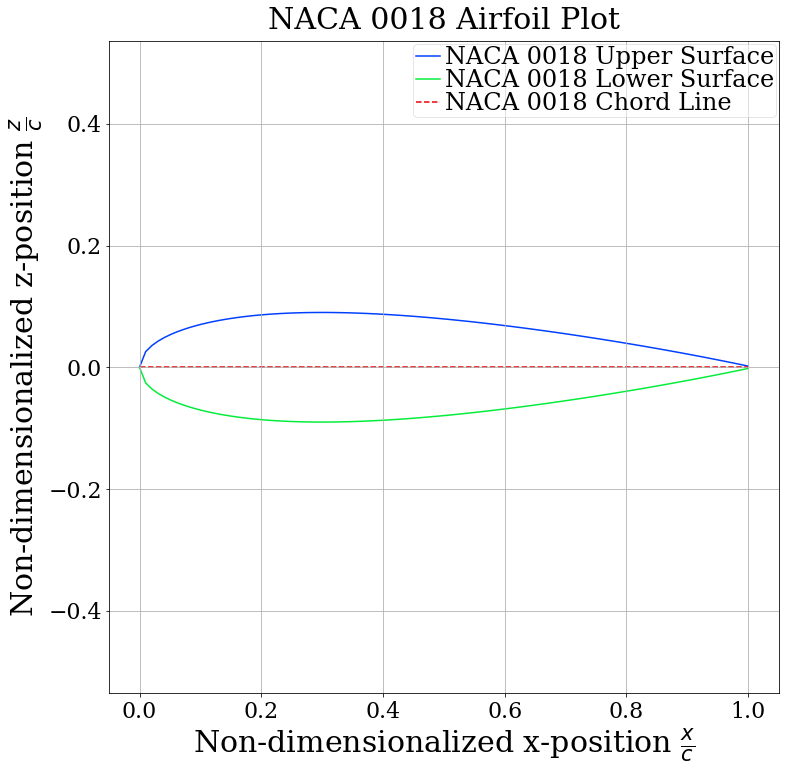

In [2]:
def NACAThicknessEquation(N, A, CA, num_points, *, use_other_x_points=0):
    """
    Generates a non-dimensionalized NACA airfoil given NACA numbers.

    Parameters
    ----------
    N : Ratio of max camber to chord length
    A : Location of max camber
    CA : Thickness ratio
    num_points : Number of points for airfoil


    Returns
    -------
    x_non_dim_full : List of non-dimenionalized points from 0 to 1 to 0
    z : Airfoil non-dimensionalized z poisition from xc = 0 to 1 to 0
    zcc : Chord line

    """
    p = 0.1 * A
    m = 0.01 * N
    t = 0.01 * CA
    if use_other_x_points is not 0:
        x_non_dim = use_other_x_points
    else:
        x_non_dim = np.linspace(0, 1, num_points)
    
    ztc = x_non_dim*0
    
    # Find thickness relative to camber
    ztc += 0.2969 * (x_non_dim**0.5)
    ztc -= 0.1260 * (x_non_dim**1)
    ztc -= 0.3516 * (x_non_dim**2)
    ztc += 0.2843 * (x_non_dim**3)
    ztc -= 0.1015 * (x_non_dim**4)
    
    ztc *= t/0.2
    
    
    # Find camber line
    zcc = 0*x_non_dim
    try:
        for i in zip(*np.where(x_non_dim <= p)):
            zcc[i] = 2*p*x_non_dim[i]
            zcc[i] -= x_non_dim[i]**2
            zcc[i] *= m * p**-2
    
        for i in zip(*np.where(x_non_dim > p)):
            zcc[i] = 1 - 2*p
            zcc[i] += 2*p*x_non_dim[i]
            zcc[i] -= x_non_dim[i]**2
            zcc[i] *= m * (1-p)**-2

    except:
        zcc = 0*x_non_dim


    # Sum the two
    zup = zcc + ztc
    zdown = zcc - ztc

    return x_non_dim, zup, zdown, zcc

x, upper, lower, chord = NACAThicknessEquation(0, 0, 18, 100)
column_names = ["NACA 0018 X", "NACA 0018 Upper"]
airfoil_df = pd.DataFrame(columns=column_names)

airfoil_df["NACA 0018 X"], airfoil_df["NACA 0018 Upper"]= x, upper
airfoil_df["NACA 0018 Lower"], airfoil_df["NACA 0018 Chord"] = lower, chord



fig, NACAsymplot = plt.subplots()
plothusly(NACAsymplot,
          airfoil_df["NACA 0018 X"],
          airfoil_df["NACA 0018 Upper"],
          xtitle=r'Non-dimensionalized x-position $\frac{x}{c}$',
          ytitle=r'Non-dimensionalized z-position $\frac{z}{c}$',
          datalabel="NACA 0018 Upper Surface",
          title="NACA 0018 Airfoil Plot")

plothus(NACAsymplot,
        airfoil_df["NACA 0018 X"],
        airfoil_df["NACA 0018 Lower"],
        datalabel='NACA 0018 Lower Surface',
        linestyle="-")

plothus(NACAsymplot,
        airfoil_df["NACA 0018 X"],
        airfoil_df["NACA 0018 Chord"],
        datalabel='NACA 0018 Chord Line',
        linestyle="--")

plt.axis('equal')

Notice that the camber line is flat, and the airfoil thickness is symmetrically distributed across both the upper and lower surface. 

### 1.2 | Cambered Airfoils

The goal of problem 1.2 is to plot the geometry of the NACA 2418 airfoil, a cambered version of the previous NACA 0018 airfoil. 

#### 1.2.1 | Approach

Given that the calculation of the NACA geometry was generalized in the previous problem (including the camber line calculation), the function was simply called again using the updated values. The data was added to the pandas dataframe, and the airfoil geometry was then plotted using matplotlib's pyplot library. 

#### 1.2.2 | Equations

The equations used in this problem were identical to those used in Problem 1.1. They are the NACA thickness distribution equation:


$$\begin{equation}
    \frac{z_t}{c} = \frac{t}{0.2} [ 0.2969\sqrt{\frac{x}{c}} - 0.1260(\frac{x}{c}) - 0.3516 (\frac{x}{c})^2 + 0.2843 (\frac{x}{c})^2 - 0.1015(\frac{x}{c})^4]
\end{equation}$$

and the NACA camber line piecewise functions:

$$\begin{equation}
    \frac{z_c}{c} = \frac{m}{p^2} (2p(\frac{x}{c}) - (\frac{x}{c})^2);\,\,\,\, 0 \leq \frac{x}{c} \leq p
\end{equation}$$

$$\begin{equation}
    \frac{z_c}{c} = \frac{m}{(1-p)^2} ((1-2p) + 2p(\frac{x}{c}) - (\frac{x}{c})^2);\,\,\,\, p \leq \frac{x}{c} \leq 1
\end{equation}$$

#### 1.2.3 | Code and Results

(-0.05, 1.05, -0.08098210776209103, 0.11816153147579744)

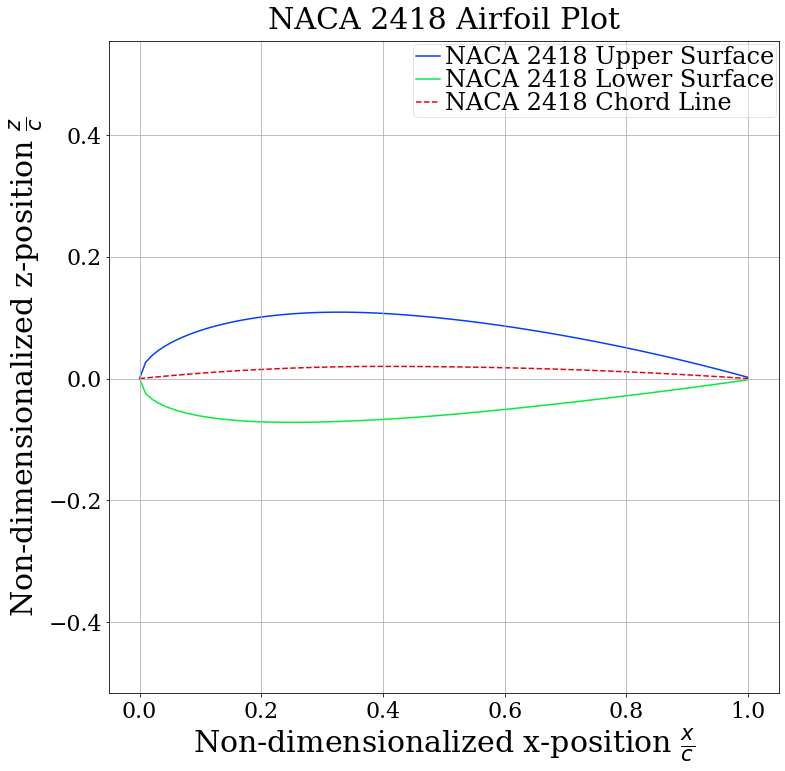

In [3]:
x, upper, lower, chord = NACAThicknessEquation(2, 4, 18, 100)

airfoil_df["NACA 2418 X"], airfoil_df["NACA 2418 Upper"] = x, upper
airfoil_df["NACA 2418 Lower"], airfoil_df["NACA 2418 Chord"] = lower, chord


fig, NACAplot = plt.subplots()
plothusly(NACAplot,
          airfoil_df["NACA 2418 X"],
          airfoil_df["NACA 2418 Upper"],
          xtitle=r'Non-dimensionalized x-position $\frac{x}{c}$',
          ytitle=r'Non-dimensionalized z-position $\frac{z}{c}$',
          datalabel="NACA 2418 Upper Surface",
          title="NACA 2418 Airfoil Plot")

plothus(NACAplot,
        airfoil_df["NACA 2418 X"],
        airfoil_df["NACA 2418 Lower"],
        datalabel='NACA 2418 Lower Surface',
        linestyle="-")

plothus(NACAplot,
        airfoil_df["NACA 2418 X"],
        airfoil_df["NACA 2418 Chord"],
        datalabel='NACA 2418 Chord Line',
        linestyle="--")

plt.axis('equal')

Note that the maximum camber occurs at the $\frac{x}{c} = 0.4$, as expected from the NACA number.

## 2 | Airfoil Wake Drag

The goal of Problem 2 is to determine the sectional drag on a non-dimensionalized 2D airfoil through the momentum-deficit method. The data is then to be fit with a polynomial of appropriate degree, and then the sectional drag is to be recalculated using the fit curve, and then compared. The fit and the original data are to be graphed, and then compared.

#### 2.1 | Approach 

A function to calculate momentum deficit is made from the given equation in the problem statement, and numerically integrates using numpy's trapz() function. The data is then read from the given file using numpy's loadtxt() function, and the array is placed into a pandas dataframe for easy access. The sectional drag D' is then calculated for the given data using the momentum deficit calculation function, and is printed to console. 

The original data is then curve-fit using numpy's polyfit() function. After experimentation, a 6th degree polynomial was found to be appropriate, given that the generated profile closely matches a typical wake velocity distribution (note the curve flattens as it approaches the edge). The sectional drag was then calculated using the polynomial fit using the momentum deficit function, and then the results are printed to console.

The polynomial fit and the original data were then plotted for comparison, using matplotlib's pyplot library. As it is a fluid velocity profile, the area under the polynomial curve is shaded and arrows are drawn.

#### 2.2 | Equations

The momentum deficit equation was used to calculate the sectional drag, and is expressed as:

$$\begin{equation}
    D' = \rho \int_{h} ^{b} u_2(u_1 - u_2) \, dy
\end{equation}$$

#### 2.3 | Code and Results

Sectional drag D' from given data is 0.3045148928571428
Sectional drag D' from 6th degree polynomial fit is 0.30747416550285955


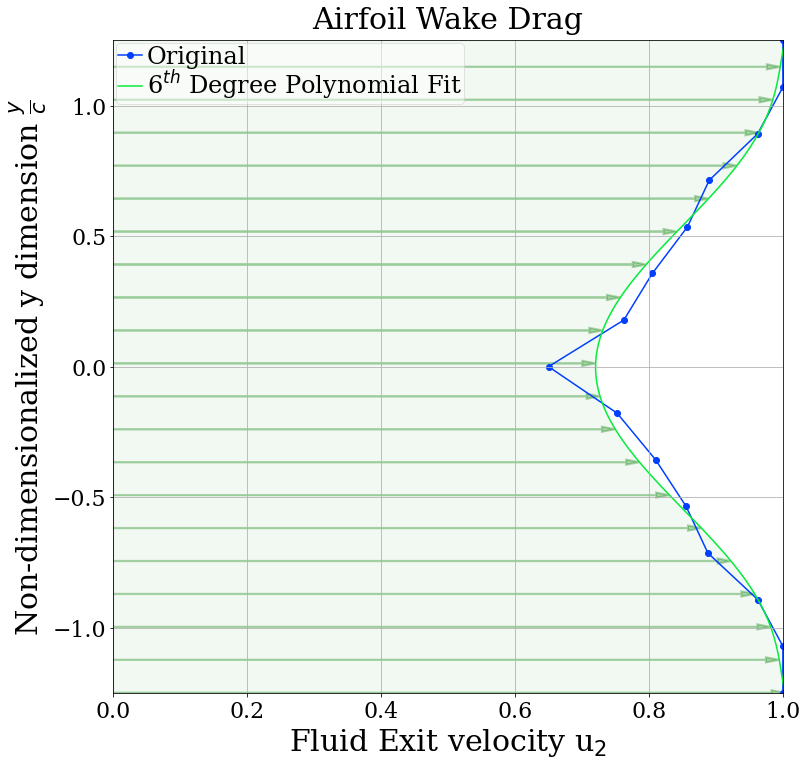

In [4]:
def MomentumDeficit(y_non_dim, u1, u2, rho):
    """
    Calculates momentum defecit from incoming and outgoing fluid velocity

    Parameters
    ----------
    y_non_dim : Non-dimensionalized y values
    u1 : Fluid entrance profile
    u2 : Fluid exit profile
    rho : Fluid density

    Returns
    -------
    Dprime : Sectional Drag D'

    """

    internal = u2 * (u1 - u2)
    Dprime = np.trapz(internal, y_non_dim)
    Dprime *= rho
    return Dprime


wakeveldat = np.loadtxt('Data/WakeVelDist.dat', delimiter=',')
column_names = ["y/c", "u1", "u2"]
wake_velocity_dat = pd.DataFrame(wakeveldat, columns=column_names)
rho = 1.2

sectional_drag = MomentumDeficit(wake_velocity_dat["y/c"],
                                 wake_velocity_dat["u1"],
                                 wake_velocity_dat["u2"],
                                 rho)

coeffs = np.polyfit(wake_velocity_dat["y/c"], wake_velocity_dat["u2"], 6)

yc = np.linspace(-1.25, 1.25, 100)
u2 = 0*yc

coeffs = np.flip(coeffs)

for k in range(len(coeffs)):
    u2 += coeffs[k] * (yc**k)

sectional_drag_2 = MomentumDeficit(yc, 1, u2, rho)

fig, test = plt.subplots()
plothusly(test,
          wake_velocity_dat["u2"],
          wake_velocity_dat["y/c"],
          datalabel='Original',
          xtitle=r'Fluid Exit velocity u$_2$',
          ytitle=r'Non-dimensionalized y dimension $\frac{y}{c}$',
          marker='o',
          title='Airfoil Wake Drag')
plothus(test, u2, yc, datalabel=r'6$^{th}$ Degree Polynomial Fit')
plt.xlim([0, 1])
plt.ylim([-1.25, 1.25])


# Shade in boundary layer
vline = u2*0
plt.fill_betweenx(yc, 0, u2, color='green', alpha=0.05)


# Make Arrows
arrowwidth, arrowlength = 0.02, 0.02

for i in range(0, len(yc), 5):
    if abs(u2[i]) < arrowlength:
        plt.plot([0, u2[i]], [yc[i], yc[i]], color='green')
    else:
        plt.arrow(0, yc[i], u2[i]-arrowlength, 0, head_width=arrowwidth,
                  head_length=arrowlength, color='green', linewidth=2, alpha=0.3)

# Print results


string1 = f"Sectional drag D' from given data is {sectional_drag}"
string2 = f"Sectional drag D' from 6th degree polynomial fit is {sectional_drag_2}"

print(string1)
print(string2)

Sectional drag calculated from the given data was 0.3045, and the sectional drag calculated from the polynomial fit was 0.3074, indicating that the 6th degree polynomial is an appropriate fit.

## 3 | XFOIL Introduction

This section is designed as an introduction to XFOIL, a program developed by Prof. Mark Drela at MIT, which calculates flow properties of 2D airfoils. For this section, both airfoils generated in Problem 1 were used (NACA 2418, NACA 0018). For both airfoils, at $Re=0, 6e5$, for $\alpha=0, 11$, pressure distribution along the x axis is recorded, and lift, drag, and moment coefficients are recorded. The data is then used in the subsequent problems.

### 3.1 | Symmetric vs. Cambered Airfoil Surface Pressure Comparison

The goal of Problem 3.1 is to compare cambered and symmetric airfoils by plotting the pressure distribution data for viscid flow for each at $\alpha=0$, and comparing the plotted data.

#### 3.1.1 | Approach

To generate C$_P(x)$ data, each airfoil geometry is first generated using XFOIL. The respective Reynold's number is then set using the _> RE_ command (prefaced by _> visc_ for viscous flow), and then the data is generated using _> alfa_ command. The pressure distribution is then saved using _> CPWR filename_, and the upper and lower pressure curves were seperated by hand. 

The generated data was then imported using numpy's loadtxt() function. Two plots were generated using matplotlib's pyplot function, comparing pressure distribution on the upper and lower surfaces for both airfoils at each angle of attack. Note that the direction of the $y$-axis is reversed, so as to better visualize the effect of the pressure distribution on the airfoil.

#### 3.1.2 | Equations

No equations were used in this problem. Data was generated from XFOIL, and then read and plotted. This problem is primarily an an excersize to gain familiarity with XFOIL.

#### 3.1.3 | Code and Results

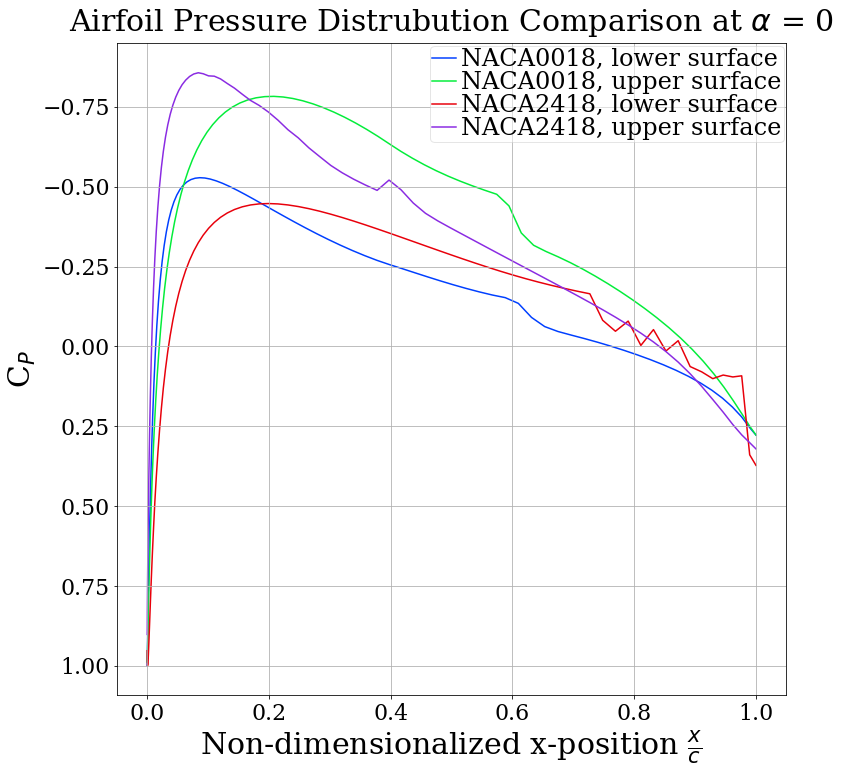

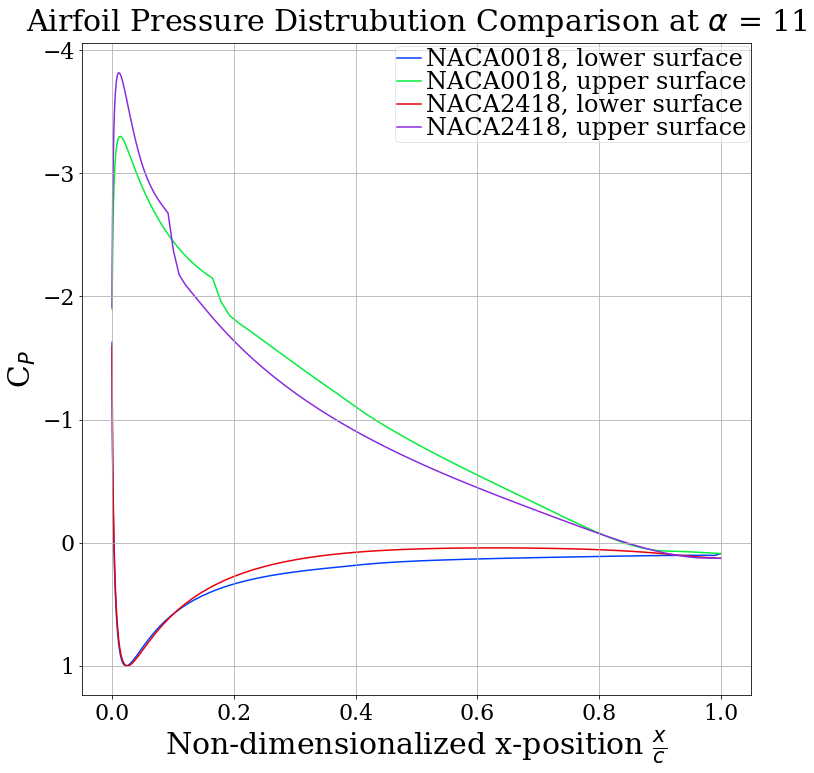

In [5]:

# Symmetric
airfoilflatHIlo0 = np.loadtxt("Data/naca2418/naca2418ReHI0lower.text", skiprows=1)
airfoilflatHIhi0 = np.loadtxt("Data/naca2418/naca2418ReHI0upper.text", skiprows=1)
airfoilflatHIlo11 = np.loadtxt("Data/naca2418/naca2418ReHI11lower.text", skiprows=1)
airfoilflatHIhi11 = np.loadtxt("Data/naca2418/naca2418ReHI11upper.text", skiprows=1)

# Cambered
airfoilcurveHIlo0 = np.loadtxt("Data/naca0018/naca0018ReHI0lower.text", skiprows=1)
airfoilcurveHIhi0 = np.loadtxt("Data/naca0018/naca0018ReHI0upper.text", skiprows=1)
airfoilcurveHIlo11 = np.loadtxt("Data/naca0018/naca0018ReHI11lower.text", skiprows=1)
airfoilcurveHIhi11 = np.loadtxt("Data/naca0018/naca0018ReHI11upper.text", skiprows=1)



alpha = 0
fig, presplot0 = plt.subplots()

naca = '0018'
plothusly(presplot0,
          airfoilflatHIlo0[:, 0],
          airfoilflatHIlo0[:, 1],
          datalabel=fr'NACA{naca}, lower surface',
          xtitle=r'Non-dimensionalized x-position $\frac{x}{c}$',
          ytitle=r'C$_P$',
          title=fr'Airfoil Pressure Distrubution Comparison at $\alpha$ = {alpha}')

plothus(presplot0,
        airfoilflatHIhi0[:, 0],
        airfoilflatHIhi0[:, 1],
        datalabel=fr'NACA{naca}, upper surface'
        )

naca='2418'
plothus(presplot0,
        airfoilcurveHIlo0[:, 0],
        airfoilcurveHIlo0[:, 1],
        datalabel=fr'NACA{naca}, lower surface',
        )

plothus(presplot0,
        airfoilcurveHIhi0[:, 0],
        airfoilcurveHIhi0[:, 1],
        datalabel=fr'NACA{naca}, upper surface'
        )
plt.gca().invert_yaxis()

alpha = 11
fig, presplot11 = plt.subplots()

naca = '0018'
plothusly(presplot11,
          airfoilflatHIlo11[:, 0],
          airfoilflatHIlo11[:, 1],
          datalabel=fr'NACA{naca}, lower surface',
          xtitle=r'Non-dimensionalized x-position $\frac{x}{c}$',
          ytitle=r'C$_P$',
          title=fr'Airfoil Pressure Distrubution Comparison at $\alpha$ = {alpha}')

plothus(presplot11,
        airfoilflatHIhi11[:, 0],
        airfoilflatHIhi11[:, 1],
        datalabel=fr'NACA{naca}, upper surface'
        )

naca='2418'
plothus(presplot11,
        airfoilcurveHIlo11[:, 0],
        airfoilcurveHIlo11[:, 1],
        datalabel=fr'NACA{naca}, lower surface',
        )

plothus(presplot11,
        airfoilcurveHIhi11[:, 0],
        airfoilcurveHIhi11[:, 1],
        datalabel=fr'NACA{naca}, upper surface'
        )
plt.gca().invert_yaxis()

Consider the graph for $\alpha=0$:

The cambered airfoil has a higher peak C$_P$ magnitude, which occurs closer to the leading edge than that of the symmetric airfoil ($\approx$ 0.1 to 0.2). However, at $\frac{x}{c} = 0.2$ the magnitude of the pressure distribution on the upper surface for the symmetric airfoil is higher than that of the cambered airfoil for the cambered airfoil. The pressure distribution for the lower surfaces follow the opposite pattern; the symmetric airfoil has a higher peak value, and the cambered airfoil has a higher C$_P$ value across the whole surface. 

For the pressure distribution at $\alpha=11$, there remain some similarities in the comparison. The peak magnitude of the pressure distribution across the upper surface for the cambered airfoil is greater than that of the symmetric airfoil, but the symmetric airfoil retains a slightly higher magnitude across the rest of airfoil length. Note that the peak C$_P$ values occur at the same x point for both airfoils for this angle of attack. 

The pressure distribution across the lower surface for both airfoils is extremely similar at this angle of attack. Note that all pressure distributions converge to approximately the same value at $\frac{x}{c} = 1$.

The reason for the difference is the addition of the camber; the maximum thickness of the airfoil for the upper surface of the cambered airfoil is greater than that of the upper surface for the symmetric airfoil, which creates a greated peak C$_P$ value. Likewise, the maximum thickness across the lower surface for the symmetric airfoil is greater than that of the cambered value, thus the higher peak.


### 3.2 | Inviscid vs. Viscid Flow Comparison

The primary goal of Problem 3.2 is to compare inviscid and viscid flow regimes for the NACA 0018 airfoil by plotting the pressure distribution for each, and comparing.

#### 3.2.1 | Approach

The pressure distribution data is generated from XFOIL, using the method as described in Problem 3.1. The majority of the work in the problem is in the data-generation phase, and is from then on a plotting excersize. Pressure distribution data for both upper and lower surfaces, for both flow types, is plotted using matplotlib's pyplot library, and is then compared.

#### 3.2.2 | Equations

No equations were used for this problem, as it is primarily a plotting excersize.

#### 3.2.3 | Code and Results

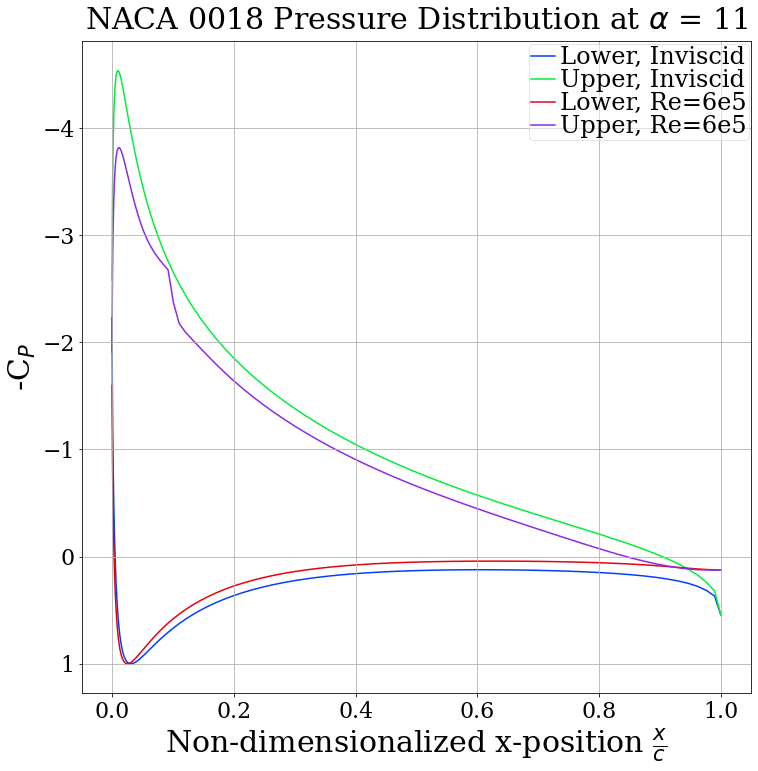

In [6]:
naca='0018'; alpha = 11

# Inviscid

airfoilflatLOlo = np.loadtxt("Data/naca0018/naca0018ReLO11lower.text", skiprows=1)
airfoilflatLOhi = np.loadtxt("Data/naca0018/naca0018ReLO11upper.text", skiprows=1)

# Viscid
airfoilflatHIlo = np.loadtxt("Data/naca0018/naca0018ReHI11lower.text", skiprows=1)
airfoilflatHIhi = np.loadtxt("Data/naca0018/naca0018ReHI11upper.text", skiprows=1)



fig, presplot4 = plt.subplots()

plothusly(presplot4,
          airfoilflatLOlo[:, 0],
          airfoilflatLOlo[:, 1],
          datalabel='Lower, Inviscid',
          xtitle=r'Non-dimensionalized x-position $\frac{x}{c}$',
          ytitle=r'-C$_P$',
          title=fr'NACA {naca} Pressure Distribution at $\alpha$ = {alpha}')

plothus(presplot4,
        airfoilflatLOhi[:, 0],
        airfoilflatLOhi[:, 1],
        datalabel='Upper, Inviscid',
        )

plothus(presplot4,
        airfoilflatHIlo[:, 0],
        airfoilflatHIlo[:, 1],
        datalabel='Lower, Re=6e5',
        )

plothus(presplot4,
        airfoilflatHIhi[:, 0],
        airfoilflatHIhi[:, 1],
        datalabel='Upper, Re=6e5',
        )
plt.gca().invert_yaxis()

Pressure values for the inviscid flow regime across the upper surface are greater than that of the viscid flow regime for both surfaces at all points. This is to be expected, as by definition for the inviscid flow, the fluid experiences no shear stress from the surface of the airfoil. Note that the peaks occur at the same points across the airfoil. 

### 3.3 | Force and Moment Integration 

The goal of Problem 3.3 is to generate lift, drag, and moment coefficients from the XFOIL generated pressure data for the NACA 2418 airfoil, and then compared to the XFOIL generated data.

#### 3.3.1 | Approach

C$_l$, C$_d$, and C$_m$ can be calculated for using C$_n$, C$_a$ and C$_{m, LE}$, which can be found by integrating the pressure coefficient distribution across both upper and lower surfaces of the airfoil.

To find C$_n$, a function was created which accepts C$_P$ distributions for the upper and lower surfaces as inputs, and integrated using numpy's trapz() function, using the integral given in the problem statement. Given that the arrays are of different sizes, it was necessary to split the integral into its component terms. 

To find C$_{m, LE}$, a similar function was created with the same inputs as the previous function. Using the integral for C$_{m, LE}$ given in the problem statement, the each term was split into component terms, and integrated using numpy's trapz() function, and then returned.


To find C$_a$, a function was created which accepts airfoil geomtry data, in addition to the same pressure distributions as the previous functions. The derivative of the upper and lower surface geometry with respect to x is found using numpy's gradient() function, using data from Problem 1. However, as the x-points generated for the airfoil geometry do not necessary line up with the x points used in the pressure distribution, interpolated values for the derivative is found at each pressure distribution point using numpy's interp() function. The integral is then split into its corresponding parts, integrated, and then returned. 

The C$_l$ and C$_d$ values are then found through a rotation, as given in the Equations section. The C$_{m, LE}$ is then converted to C$_{m, c=\frac{1}{4}}$.

These functions are called for both viscid and inviscid flow types for the NACA 2418 airfoil, and then the data is printed to console. 

In [7]:
def CalculateCn(Cplx, Cply, Cpux, Cpuy, *, c=1):
    left = np.trapz(Cply, Cplx)
    right = np.trapz(Cpuy, Cpux)
    out = (left - right)
    out /= c
    return out

def CalculateCa(Cplx, Cply, Cpux, Cpuy, xc, ztu, ztl,  *, c=1):
    gradu = np.gradient(ztu, xc)
    gradl = np.gradient(ztl, xc)
    
    graduvec = np.zeros((len(Cpux)))
    gradlvec = np.zeros((len(Cplx)))
    
    for i in range(len(graduvec)):
        graduvec[i] = np.interp(Cpux[i], xc, gradu)

    for i in range(len(gradlvec)):
        gradlvec[i] = np.interp(Cplx[i], xc, gradl)
    left = np.trapz(Cpuy*graduvec, Cpux)
    right = np.trapz(Cply*gradlvec, Cplx)

    
    out = (left - right)/c
    return out

def CalculateCmLE(Cplx, Cply, Cpux, Cpuy, *, c=1):
    """
    Determines moment coefficient from the leading edge.

    Parameters
    ----------
    Cplx : x-data for lower Cp
    Cply : y-data for lower Cp
    Cpux : x-data for upper Cp
    Cpuy : y-data for upper Cp
    c : Chord length, default 1 (non-dimensionalized)

    Returns
    -------
    CmLE : Moment Coefficient CmLE

    """
    left = np.trapz(Cpuy*Cpux, Cpux)
    right = np.trapz(Cply*Cplx, Cplx)
    CmLE = left - right
    CmLE /= c**2
    return CmLE

def RotateC(C_n, C_a, C_mLE, alpha):
    C_l = C_n*np.cos(np.deg2rad(alpha)) - C_a * np.sin(np.deg2rad(alpha))
    C_d = C_n*np.sin(np.deg2rad(alpha)) + C_a * np.cos(np.deg2rad(alpha))
    
    C_m4 = C_mLE + 0.25*C_l
    return C_l, C_d, C_m4



# Problem 3.3
alpha = 11
airfoilcurveLOlo11 = np.loadtxt("Data/naca2418/naca2418ReLO11lower.text", skiprows=1)
airfoilcurveLOhi11 = np.loadtxt("Data/naca2418/naca2418ReLO11upper.text", skiprows=1)


# Calculate for Inviscid

# Flipping upper surface is necessary, since it is reversed.
CmLOi = CalculateCmLE(airfoilcurveLOlo11[:, 0],
                      airfoilcurveLOlo11[:, 1],
                      np.flip(airfoilcurveLOhi11[:, 0]),
                      np.flip(airfoilcurveLOhi11[:, 1]))

CaLO = CalculateCa(airfoilcurveLOlo11[:, 0],
                   airfoilcurveLOlo11[:, 1],
                   np.flip(airfoilcurveLOhi11[:, 0]),
                   np.flip(airfoilcurveLOhi11[:, 1]),
                   airfoil_df["NACA 2418 X"],
                   airfoil_df["NACA 2418 Upper"],
                   airfoil_df["NACA 2418 Lower"])

CnLO = CalculateCn(airfoilcurveLOlo11[:, 0],
                   airfoilcurveLOlo11[:, 1],
                   np.flip(airfoilcurveLOhi11[:, 0]),
                   np.flip(airfoilcurveLOhi11[:, 1]))


# Report Results
ClLO, CdLO, CmLO = RotateC(CnLO, CaLO, CmLOi, alpha)
string = f'For Re = 0, Cl = {ClLO}, Cd = {CdLO}, Cm = {CmLO}'
print(string)



# Calculate for viscid
CmHI = CalculateCmLE(airfoilcurveHIlo11[:, 0],
                     airfoilcurveHIlo11[:, 1],
                     np.flip(airfoilcurveHIhi11[:, 0]),
                     np.flip(airfoilcurveHIhi11[:, 1]))

CaHI = CalculateCa(airfoilcurveHIlo11[:, 0],
                   airfoilcurveHIlo11[:, 1],
                   np.flip(airfoilcurveHIhi11[:, 0]),
                   np.flip(airfoilcurveHIhi11[:, 1]),
                   airfoil_df["NACA 2418 X"],
                   airfoil_df["NACA 2418 Upper"],
                   airfoil_df["NACA 2418 Lower"])

CnHI = CalculateCn(airfoilcurveHIlo11[:, 0],
                   airfoilcurveHIlo11[:, 1],
                   np.flip(airfoilcurveHIhi11[:, 0]),
                   np.flip(airfoilcurveHIhi11[:, 1]))


# Report Results
ClHI, CdHI, CmHI = RotateC(CnHI, CaHI, CmHI, alpha)
string = f'For Re = 6e5, Cl = {ClHI}, Cd = {CdHI}, Cm = {CmHI}'
print(string)


For Re = 0, Cl = 1.6422310236752027, Cd = 0.009034455927694474, Cm = -0.06251660379120577
For Re = 6e5, Cl = 1.1383696590219259, Cd = -0.042558981257384054, Cm = 0.03515775736821847


The data can be tabulated as follows:

For Re=$\infty$=0

|            | C$_l$  | C$_d$   | C$_m$   |
|------------|--------|---------|---------|
| XFOIL      | 1.6447 | 0.00000 | -0.0850 |
| Integrated | 1.6422 | 0.0090  | -0.0625 |


For Re=6e5:

|            | C$_l$  | C$_d$   | C$_m$   |
|------------|--------|---------|---------|
| XFOIL      | 1.2761 | 0.01783 | -0.0190 |
| Integrated | 1.1383 | -0.0425 | 0.035   |

For the invsicid flow case, the integration method produces results very similar to the values produced by XFOIL, with a few minor differences that can be attributed to error from the numeric integration. For the invsicid flow case, with the exception of the C$_L$ value, the answers vary wildly. 


## 4 | Additional Aerodynamics Problems

These problems were taken from the _Fundamentals of Aerodynamics, 5$\,^{th}$ Edition_ by John D. Anderson, Jr. 

### 4.1 | Problem 1.15

An aircraft similar to a Cessna Skylane is flying in level, steady flight at sea level. It has a wing area of 174 ft$^2$, and a weight of 2950 lbs. Its drag coefficient is a function of its lift coefficient, and given in the problem statement. The atmospheric density is 0.002377 slug/ft$^3$. For flight velocity varying between 70 and 250 ft/s, find coefficient of lift and drag, and the lift-to-drag ratio for the aircraft. Make observations about the results.

#### 4.1.1 | Approach

The aircraft in this problem is created as an object. When initialized, values for aircraft weight, wing area, and atmospheric density are assigned as object properties. The object is then given a function to return C$_L$, C$_D$, and L/D values as a function of input velocity.

Given the assumption of level, steady flight in the problem statement, the lift value of the aircraft is assumed to be equal to the weight of the aircraft. The C$_L$ value is then determined using the lift equation. The C$_D$ value is calculated using the relation as given in the problem statement, and the aircraft drag value is then calculated from C$_D$ using the drag equation. The L/D ratio is determined by dividing the lift value from the calculated drag, and then the C$_L$, C$_D$, and L/D values are returned. 

Having finished object properties, the actual object can be initialized with the values given in the problem statement. Storage arrays for C$_L$, C$_D$, and L/D values are created using numpy, and a list of aircraft velocities are generated using numpy's linspace() function. Each velocity value is iterated over, and C$_L$, C$_D$, and L/D values are calculated and then stored. Each is then plotted using matplotlib's pyplot library.

#### 4.1.2 | Equations

The lift equation is given by:

$$\begin{equation}
    L = \frac{1}{2}\rho_{\infty} V_{\infty}^2 S C_L
\end{equation}$$

Rearranging to solve for C$_L$:

$$\begin{equation}
    C_L = \frac{2L}{\rho_{\infty} V_{\infty}^2 S}
\end{equation}$$

Drag coefficient C$_D$ is a function of C$_L$, and is given by:

$$\begin{equation}
    0.0025 + 0.0054C_L^2
\end{equation}$$

Drag force is given by:

$$\begin{equation}
    D = \frac{1}{2}\rho_{\infty} V_{\infty}^2 S C_D
\end{equation}$$

Lift-to-drag ratio is given as the ratio between lift and drag:

$$\begin{equation}
    L/D = \frac{L}{D}
\end{equation}$$

#### 4.1.3 | Code and Results

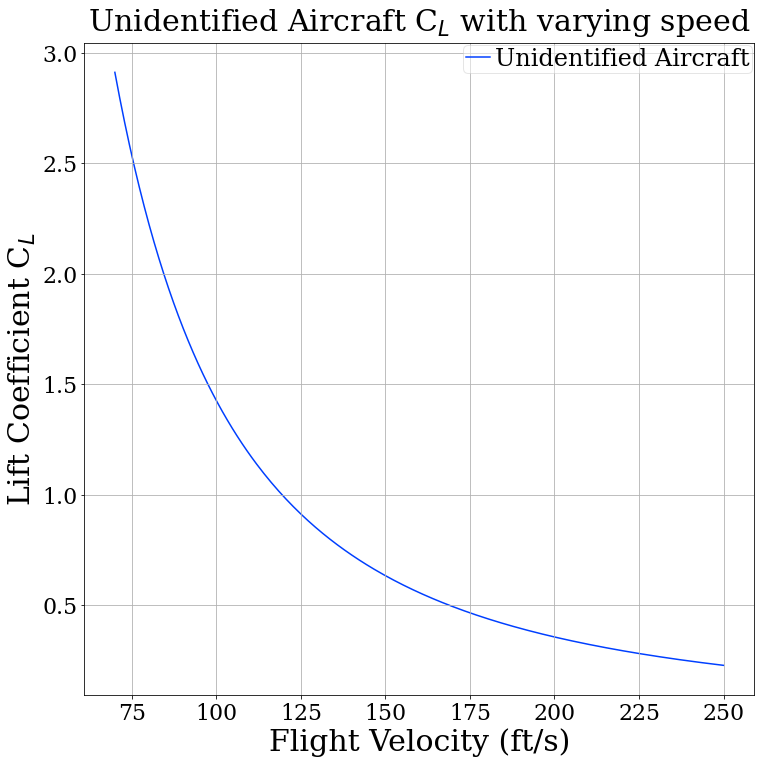

In [8]:

class Airplane115():
    
    def __init__(self, wing_area, weight, rho):
        """
        Airplane used in problem 1.15

        Parameters
        ----------
        wing_area : Wing area in ft^2
        weight : Aircraft weight in lbs
        rho : Air density in slug

        Returns
        -------
        None.

        """
        self.wing_area = wing_area
        self.weight = weight
        self.rho = rho
        
    def getProperties(self, vel_inf):
        """
        Returns properties given current speed

        Parameters
        ----------
        vel_inf : Current velocity in ft/s

        Returns
        -------
        C_L : Lift Coefficient
        C_D : Drag Coefficient
        LD : Lift/Drag Ratio

        """
        
        # From steady, level flight condition:
        L = self.weight
        C_L = L * 2 / (self.rho * vel_inf**2 * self.wing_area)
        
        CDFunc = lambda CL: (0.025 + 0.054 * C_L**2)
        C_D = CDFunc(C_L)
        
        D = 0.5 * (self.rho * vel_inf**2 * self.wing_area * C_D)
        LD = L/D
        return C_L, C_D, LD


# Problem 4

# Problem 1.15

n = 250

vel_list = np.linspace(70, 250, n)

cessna_skylane = Airplane115(174, 2950, 0.002377)

c_l_vec = np.zeros((n, 1))
c_d_vec = np.zeros((n, 1))
ld_vec = np.zeros((n, 1))

for i in range(len(vel_list)):
    c_l_vec[i], c_d_vec[i], ld_vec[i] = cessna_skylane.getProperties(vel_list[i])
    
fig, c_l_plot = plt.subplots()
plothusly(c_l_plot,
          vel_list,
          c_l_vec,
          xtitle="Flight Velocity (ft/s)",
          ytitle=r'Lift Coefficient C$_L$',
          title=r'Unidentified Aircraft C$_L$ with varying speed',
          datalabel='Unidentified Aircraft')

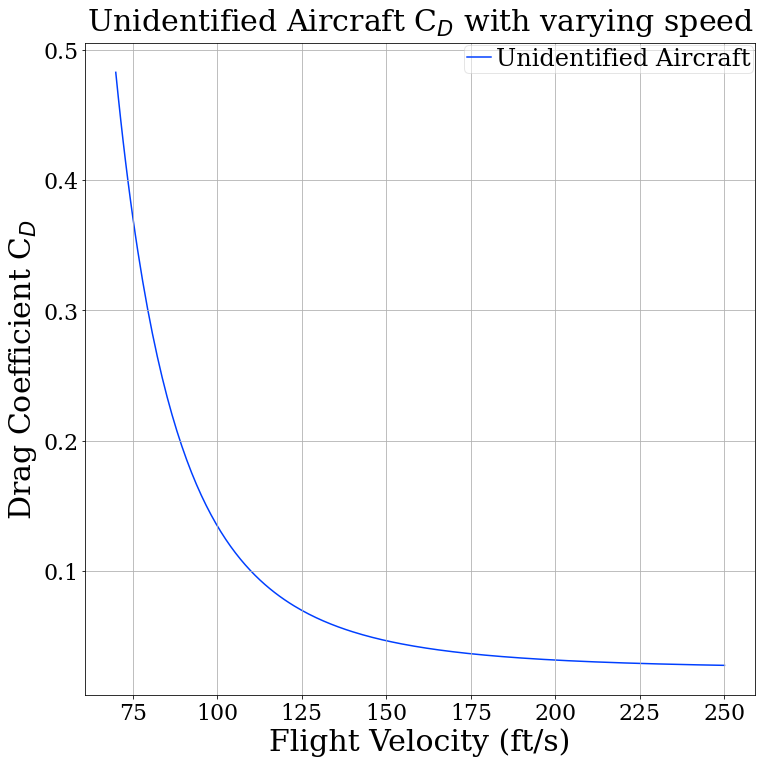

In [9]:
fig, c_d_plot = plt.subplots()
plothusly(c_d_plot,
          vel_list,
          c_d_vec,
          xtitle="Flight Velocity (ft/s)",
          ytitle=r'Drag Coefficient C$_D$',
          title=r'Unidentified Aircraft C$_D$ with varying speed',
          datalabel='Unidentified Aircraft')


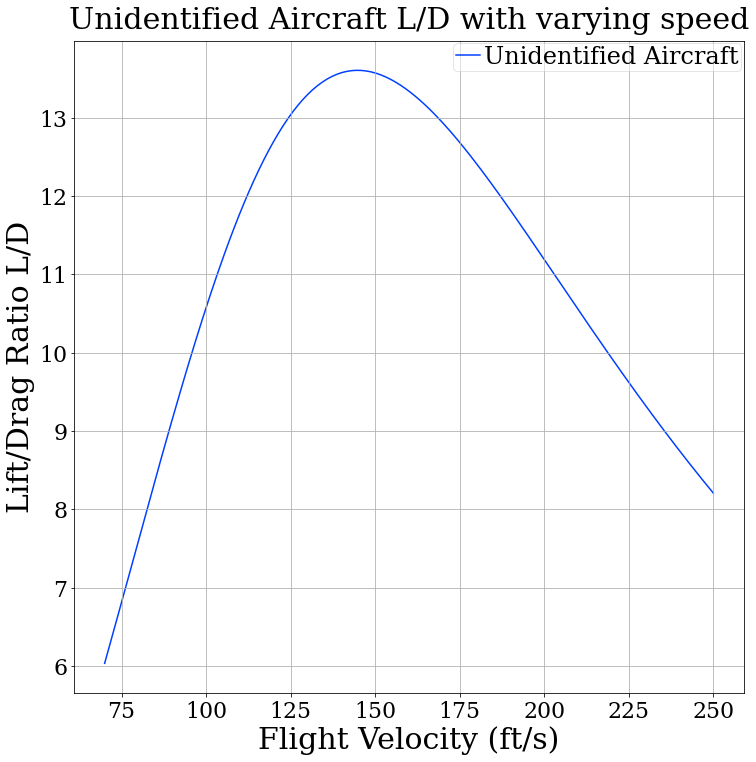

In [10]:
fig, ldplot = plt.subplots()
plothusly(ldplot,
          vel_list,
          ld_vec,
          xtitle="Flight Velocity (ft/s)",
          ytitle=r'Lift/Drag Ratio L/D',
          title=r'Unidentified Aircraft L/D with varying speed',
          datalabel='Unidentified Aircraft')

Both C$_L$ and C$_D$ decrease as a function of flight velocity, with high values for both at low speeds, levelling off at approximately 150ft/s. The L/D ratio also peaks at approximately the same point ($\approx$ 145ft/s).  These high values for C$_L$ and C$_D$ at low flight velocities are unrealistic however, and would likely be below the aircraft stall speed in practice.

### 4.2 | Problem 3.11

Prove that the stream and potential functions for a source flow satisfy Laplace's equation.

#### 4.2.1 | Approach

For source flow, stream and potential functions are both functions of a single variable. Therefore, Laplace's equation can be verified by taking the double derivative of both with respect to that variable. Stream and potential functions are generated as anonymous functions, with an aribitrary source strenth $\Lambda$.  A series of datapoints is then generated using numpy's linspace() function. The numerical derivative is then taken using numpy's gradient() function, which uses an average of forward and backward numerical differentiation. The maximum value for each is then printed. 

#### 4.2.2 | Equations

Laplace's equation is given by:

$$\begin{equation}
    \nabla^2 f = 0
\end{equation}$$

Stream potential function $\phi$ for a source flow is given as:

$$\begin{equation}
    \phi = \frac{\Lambda}{2\pi} ln(r)
\end{equation}$$

Stream function $\psi$ for a source flow is given as:

$$\begin{equation}
    \psi = \frac{\Lambda}{2\pi} \theta
\end{equation}$$

#### 4.2.3| Code and Results

In [11]:
# Problem 3.11

LAMBDA = 10  # Capital lambda, source strength

# Note: np.log is natural log
source_flow_phi = lambda r: LAMBDA/(2*np.pi) * np.log(r)
source_flow_psi = lambda theta: LAMBDA/(2*np.pi) * theta

data_points = np.linspace(1, 10, 1000000)


laplace_verified_phi = np.gradient(data_points * np.gradient(source_flow_phi(data_points))) / data_points
laplace_verified_psi = np.gradient(np.gradient(source_flow_psi(data_points))) / (data_points**2)

max_phi = max(laplace_verified_phi)
max_psi = max(laplace_verified_psi)

print(f'Max phi = {max_phi}')
print(f'Max psi = {max_psi}')

Max phi = 6.445788086295004e-11
Max psi = 1.1101630749498499e-16


The maximum values for each are not exactly zero, but approach zero as the number of elements in the data_points array increases. The non-zero quantity given for each maximum can therefore be said to be a byproduct of numerical integration, and thus Laplace's equation can be said to be satisfied for both stream and potential functions for source flow.

### 4.3 | Problem 3.16

Consider non-lifting flow over a circular cylinder of a given radius, where $V_{\infty}=20$ft/s. If the fluid flow is doubled, but the circulation remains the same, do the shape of the streamlines change? Explain.

#### 4.3.1 | Approach

No code is necessary for this problem, as it is purely an algebraic one.

#### 4.3.2 | Equations

The equation for the stream function of non-lifting flow over a circular cylinder is given as:

$$\begin{equation}
    \psi = (V_{\infty}r \, sin\theta)(1 - \frac{R^2}{r^2})
\end{equation}$$

where $R$ is the radius of the cylinder.

#### 4.3.3 | Code and Results

The stream function $\psi$ for a non-lifting cylinder is a function of $V_{\infty}$, $r$, and $\theta$. Doubling the freestream velocity will double the magnitude of the stream function, but will not change the position of the streamlines. 